<a href="https://colab.research.google.com/github/Sumiii15/Dead-Beautiful-My-first-Website/blob/main/insurancepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**. **Importing** **Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


**2**. **Loading** **and** **Preprocessing** **the** **Dataset**

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
df = pd.read_csv(path, header=None)
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.replace('?', np.nan, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


**3. Handling Missing Values**

In [4]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)


<ipython-input-4-4e1dec97f2fc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
<ipython-input-4-4e1dec97f2fc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

**4. Data Visualization**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


<Axes: xlabel='smoker', ylabel='charges'>

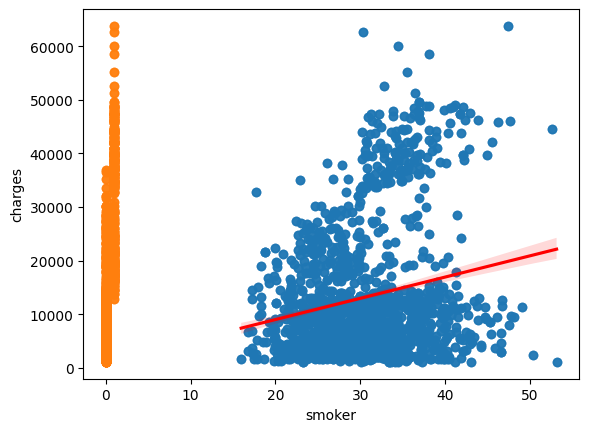

In [6]:
# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
sns.regplot(x="smoker", y="charges", data=df)


**5. Correlation Analysis**

In [7]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


**6. Simple Linear Regression**

In [8]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.6221791718835359


**7. Multiple Linear Regression**

In [9]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504083816310174


**8. Pipeline with Polynomial Regression**

In [10]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8452576157336337


**9. Ridge Regression**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6760807753399254


**10. Polynomial Transformation with Ridge**

In [12]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.7835631069813792


**Hyperparameter Tuning**

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
grid.fit(x_train_pr, y_train)
print(grid.best_params_)

{'alpha': 1}


**Visualization of Model Predictions**

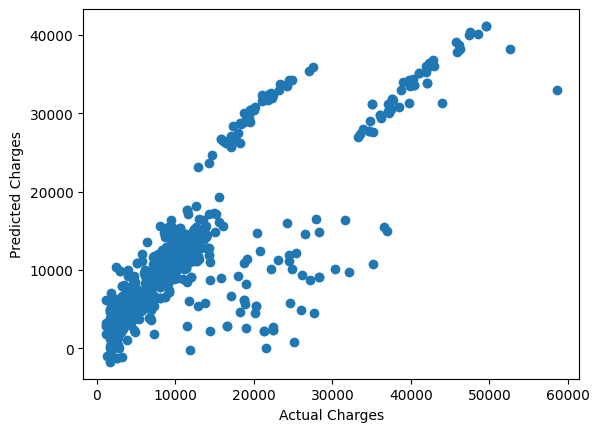

In [14]:
plt.scatter(y_test, yhat)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

**Cross-Validation**

In [15]:
scores = cross_val_score(RidgeModel, x_train_pr, y_train, cv=5, scoring='r2')
print(scores.mean())

0.8522917822523428


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions from the Linear Regression model
y_pred = lm.predict(Z)  # Z is the feature set used during training

# R² Score
r2 = r2_score(Y, y_pred)
print("R² Score (Accuracy of the model):", r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

R² Score (Accuracy of the model): 0.7504083816310174
Mean Absolute Error (MAE): 4171.112857148228
Root Mean Squared Error (RMSE): 6069.824743041013
